# Make Figure 3B: EGFR Cis effect CNV

This notebook graphs the pearson correlation between EGFR copy number and EGFR proteomics. It shows how an EGFR copy number mutation effects protein levels of EGFR (cis effect). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"
   

In [4]:
g = pc.PancanGbm()
hn = pc.PancanHnscc()
l = pc.PancanLuad()
o = pc.PancanOv()
c = pc.PancanCcrcc()
col = pc.PancanCoad()
b = pc.PancanBrca()
ls = pc.PancanLscc()
en = pc.PancanUcec()

In [5]:
col.get_clinical()

,Overall survial,"Recurrence status (1, yes; 0, no)",Recurrence-free survival,Sample_Tumor_Normal,"Survial status (1, dead; 0, alive)",baseline/ajcc_tnm_cancer_staging_edition,baseline/clinical_staging_distant_metastasis,baseline/he_staining_done,baseline/histologic_type,baseline/ihc_staining_done,...,medications/history_source,medications/medication_name_vitamins_supplements,procurement/blood_collection_minimum_required_blood_collected,procurement/blood_collection_number_of_blood_tubes_collected,procurement/normal_adjacent_tissue_collection_number_of_normal_segments_collected,procurement/tumor_tissue_collection_clamps_used,procurement/tumor_tissue_collection_frozen_with_oct,procurement/tumor_tissue_collection_number_of_tumor_segments_collected,procurement/tumor_tissue_collection_tumor_type,tumor_code
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO001,390.0,0.0,NaN,Tumor,0.0,NaN,NaN,NaN,Mucinous,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,CO
01CO005,531.0,0.0,NaN,Tumor,1.0,NaN,NaN,NaN,Not Mucinous,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,CO
01CO006,365.0,1.0,NaN,Tumor,0.0,NaN,NaN,NaN,Mucinous,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,CO
01CO008,369.0,0.0,NaN,Tumor,0.0,NaN,NaN,NaN,Mucinous,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,CO
01CO013,155.0,0.0,NaN,Tumor,0.0,NaN,NaN,NaN,Not Mucinous,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006.N,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21CO007.N,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22CO004.N,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 1 Create Data Frame

Create a df that combines proteomics and CNV data and uses only tumor samples. 

# GBM

In [7]:
#prot_CNV_Tumor = g.join_omics_to_omics(df1_name="proteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
#Example of df 
prot_CNV_Tumor = g.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)    

prot_CNV_Tumor.head()


Name,EGFR_umich_proteomics,EGFR_washu_CNV
Patient_ID,,
C3L-00104,-0.593568,0.93370
C3L-00365,0.288075,4.05715
C3L-00674,-0.434526,3.55977
C3L-00677,-1.837536,0.51424
C3L-01040,-1.583630,0.39940


#  Step 2  Call Plotting Function

Use plot_pearson function in plot_utils to graph pearson correlation.

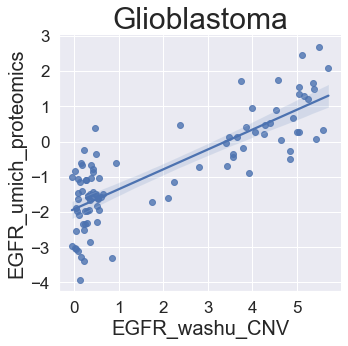

In [8]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Glioblastoma", ra_stats = False ,show_plot = True, save_file_name = "png_files/Figure3B_Gbm_pancan")

In [9]:
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


Correlation: 0.8178896916854856
P_value:4.753874182293731e-24


# Repeat Steps 1 and 2 for the other 7 cancers

# Kidney 

In [10]:
prot_CNV_Tumor = c.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)    


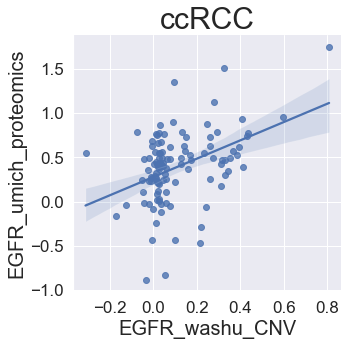

In [11]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "ccRCC", save_file_name = "png_files/Figure3B_Kidney_pancan")
#print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Ovarian 

In [30]:
prot_CNV_Tumor = o.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)  

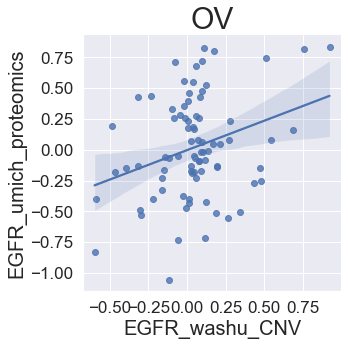

In [33]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "png_files/Figure3B_Ovarian")
# print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Colon

In [34]:
prot_CNV_Tumor = col.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop) 

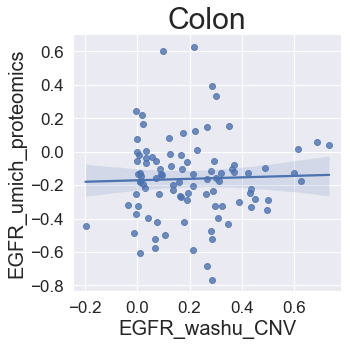

In [38]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics",hue = "none", ra_stats = False, title = "Colon", show_plot = True, save_file_name = "png_files/Figure3B_Colon")
#print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Brca 

In [16]:
prot_CNV_Tumor = b.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

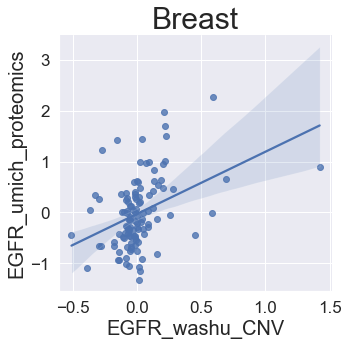

Correlation: 0.39048041854692306
P_value:1.7466668183309344e-05


In [17]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", ra_stats = False, title = "Breast", show_plot = True, save_file_name = "png_files/Figure3B_Brca_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


# LUAD

In [18]:
prot_CNV_Tumor = l.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

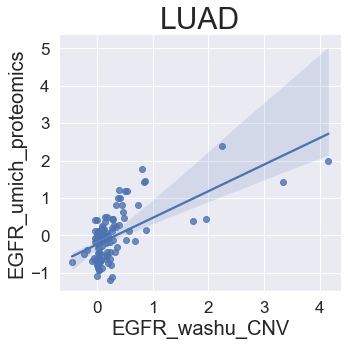

Correlation: 0.6332981736369447
P_value:1.4743992903165024e-13


In [19]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Luad_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# HNSCC

In [20]:
prot_CNV_Tumor = hn.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

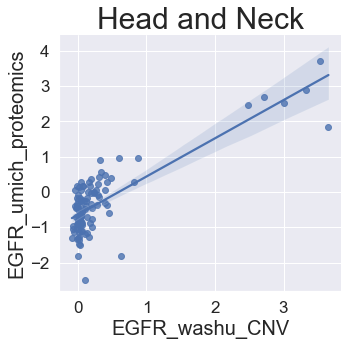

Correlation: 0.810006664630453
P_value:8.71544874274271e-27


In [21]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Head and Neck", ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Hnscc_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# LSCC

In [22]:
prot_CNV_Tumor = ls.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

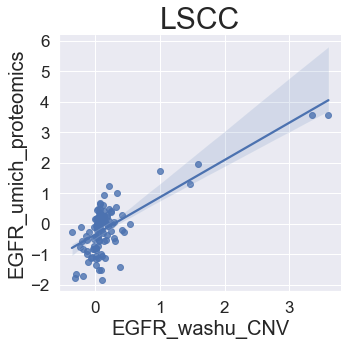

Correlation: 0.7362846816319714
P_value:4.9515664241451696e-20


In [23]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Lscc_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


# Colon

In [24]:
prot_CNV_Tumor = col.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
prot_CNV_Tumor

Name,EGFR_umich_proteomics,EGFR_washu_CNV
Database_ID,ENSP00000275493.2,ENSG00000146648.14
Patient_ID,,
01CO001,NaN,0.00073
01CO005,-0.096185,0.48886
01CO006,-0.022299,0.00503
01CO008,-0.262344,0.16487
01CO013,-0.181038,0.15962
...,...,...
21CO007,0.056176,0.68996
22CO004,-0.434379,0.34578


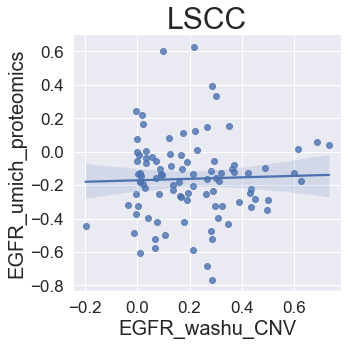

In [25]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Lscc_pancan")
#print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")
